# Wikiface > pas retenu

### Package à installer

In [20]:
# !pip install pyarrow
# !pip install fastparquet
# !pip install huggingface_hub
# !pip install datasets

### Import d'un jeu de données test de Wikiart face en dataframe

In [21]:
import pandas as pd

df = pd.read_parquet("../../delorean_art_data/test-00000-of-00001.parquet")
df.head()

KeyboardInterrupt: 

In [ ]:
df.keys()

Index(['image', 'id', 'title', 'url', 'artistUrl', 'artistName', 'artistId',
       'completitionYear', 'dictionaries', 'location', 'period', 'serie',
       'genres', 'styles', 'media', 'sizeX', 'sizeY', 'diameter', 'galleries',
       'tags', 'description', 'width', 'height', 'group'],
      dtype='object')

In [ ]:
df.isna().sum()

image                  0
id                     0
title                  0
url                    0
artistUrl              0
artistName             0
artistId               0
completitionYear    1350
dictionaries           0
location               0
period              5847
serie               6084
genres                 0
styles                 0
media                  0
sizeX               4420
sizeY               4416
diameter            6134
galleries              0
tags                   0
description            0
width                  0
height                 0
group                  0
dtype: int64

### Visualisation d'1 image

In [ ]:
dict_img = df['image'].iloc[2]
dict_img['bytes']

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02X\x01\xfc\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\x

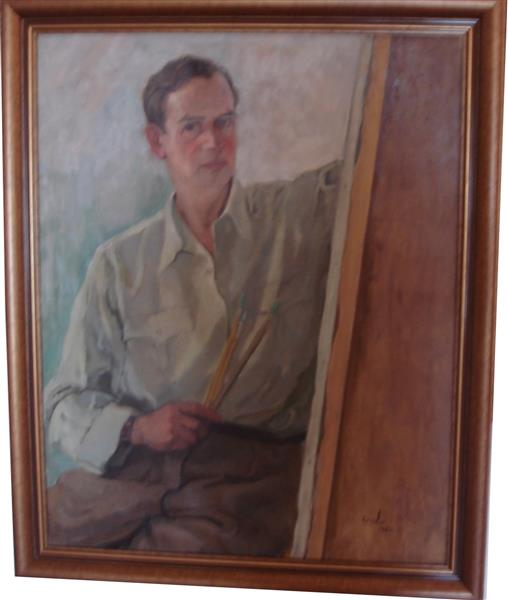

In [ ]:
from PIL import Image
import io

image_data = dict_img['bytes']
image = Image.open(io.BytesIO(image_data))
# image.show()
display(image)

In [ ]:
import numpy as np
np.array(image).shape

(600, 508, 3)

### On ne garde que les infos que nous souhaitons et transforme en np.array

In [ ]:
df_small = df[['image', 'title', 'artistName']].copy()

In [ ]:
df_small['im_array'] = df_small['image'].apply(lambda x : np.array(Image.open(io.BytesIO(x['bytes']))))

NameError: name 'df_small' is not defined

In [ ]:
df_small

,image,title,artistName,im_array
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Female Portrait,Adalbert Erdeli,"[[[219, 201, 161], [231, 213, 173], [230, 212,..."
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Portrait of the Famous Ukrainian Artist Tatian...,Adalbert Erdeli,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Self Portrait,Adalbert Erdeli,"[[[113, 70, 64], [104, 61, 55], [98, 55, 48], ..."
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Vater des Künstlers,Adolf Dietrich,"[[[81, 78, 73], [72, 69, 64], [56, 53, 48], [5..."
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Portrait of the young de Bros,Albrecht Anker,"[[[88, 46, 34], [100, 58, 46], [112, 70, 58], ..."
...,...,...,...,...
6130,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,The old lady in a bonnet. Brittany,Zinaida Serebriakova,"[[[182, 169, 150], [194, 181, 162], [180, 167,..."
6131,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Turkey (Two odalisques),Zinaida Serebriakova,"[[[253, 253, 253], [253, 253, 253], [253, 253,..."
6132,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Two Moroccan,Zinaida Serebriakova,"[[[199, 189, 187], [210, 200, 198], [207, 197,..."
6133,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,Water carrier. Morocco,Zinaida Serebriakova,"[[[219, 208, 204], [235, 224, 220], [223, 212,..."


Ensuite il faut faire une fonction pour sauvegarder le df avec les infos sous format np array dans un CSV. \
Mais finalement nous ne retenons pas cette base de données

# Wikiart

Base de données de références avec plus de 80000 tableaux, avec ou sans visage, avec 1 ou plusieurs visages

### Install dependencies

In [ ]:
# !pip install kagglehub

zsh:1: no matches found: kagglehub[pandas-datasets]


In [57]:
import pandas as pd

In [58]:
df = pd.read_csv('../../delorean_art_data/wikiart/classes.csv')
df.head()

,filename,artist,genre,description,phash,width,height,genre_count,subset
0,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train
1,Abstract_Expressionism/aaron-siskind_chicago-6...,aaron siskind,['Abstract Expressionism'],chicago-6-1961,d7d0781be51fc00e,1382,1746,1,train
2,Abstract_Expressionism/aaron-siskind_glouceste...,aaron siskind,['Abstract Expressionism'],gloucester-16a-1944,9f846e5a6c639325,1382,1857,1,train
3,Abstract_Expressionism/aaron-siskind_jerome-ar...,aaron siskind,['Abstract Expressionism'],jerome-arizona-1949,a5d691f85ac5e4d0,1382,1849,1,train
4,Abstract_Expressionism/aaron-siskind_kentucky-...,aaron siskind,['Abstract Expressionism'],kentucky-4-1951,880df359e6b11db1,1382,1625,1,train


In [59]:
df['description'][0]

'acolman-1-1955'

In [21]:
df.keys()

Index(['filename', 'artist', 'genre', 'description', 'phash', 'width',
       'height', 'genre_count', 'subset'],
      dtype='object')

In [60]:
df[['title', 'year']] = df['description'].str.rsplit('-', n=1, expand=True)
df.head()

,filename,artist,genre,description,phash,width,height,genre_count,subset,title,year
0,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train,acolman-1,1955
1,Abstract_Expressionism/aaron-siskind_chicago-6...,aaron siskind,['Abstract Expressionism'],chicago-6-1961,d7d0781be51fc00e,1382,1746,1,train,chicago-6,1961
2,Abstract_Expressionism/aaron-siskind_glouceste...,aaron siskind,['Abstract Expressionism'],gloucester-16a-1944,9f846e5a6c639325,1382,1857,1,train,gloucester-16a,1944
3,Abstract_Expressionism/aaron-siskind_jerome-ar...,aaron siskind,['Abstract Expressionism'],jerome-arizona-1949,a5d691f85ac5e4d0,1382,1849,1,train,jerome-arizona,1949
4,Abstract_Expressionism/aaron-siskind_kentucky-...,aaron siskind,['Abstract Expressionism'],kentucky-4-1951,880df359e6b11db1,1382,1625,1,train,kentucky-4,1951


In [61]:
df_wikiart = df[['artist', 'genre', 'title', 'year']]
df_wikiart.head()

,artist,genre,title,year
0,aaron siskind,['Abstract Expressionism'],acolman-1,1955
1,aaron siskind,['Abstract Expressionism'],chicago-6,1961
2,aaron siskind,['Abstract Expressionism'],gloucester-16a,1944
3,aaron siskind,['Abstract Expressionism'],jerome-arizona,1949
4,aaron siskind,['Abstract Expressionism'],kentucky-4,1951


In [62]:
df_wikiart.isna().sum()

artist       0
genre        0
title        0
year      3574
dtype: int64

In [63]:
df_wikiart.count()

artist    80042
genre     80042
title     80042
year      76468
dtype: int64

In [67]:
artist_wikiart = pd.DataFrame(df_wikiart['artist'].unique())
artist_wikiart

,0
0,aaron siskind
1,abidin dino
2,ad reinhardt
3,adnan coker
4,aki kuroda
...,...
1114,takashi murakami
1115,max bill
1116,george inness
1117,roman opalka


In [68]:
artist_wikiart.to_csv('../raw_data/csv/artist-wikiart.csv')

# POP plateforme JOCONDE

API url non utilisée car info descriptives uniquement, et de possible de télécharger les images

In [28]:
import requests

In [29]:
url ='https://data.culture.gouv.fr/api/explore/v2.1/catalog/datasets/base-joconde-extrait/records?limit=20'

In [31]:
response = requests.get(url)
if response.status_code != 200 :
    ''
else :
    data = response.json()

In [32]:
data

{'total_count': 706920,
 'results': [{'reference': '02340000161',
   'ancien_depot': None,
   'appellation': None,
   'ancienne_appartenance': None,
   'ancienne_attribution': None,
   'auteur': "SCHNORR J. (graveur);FLAXMAN John (d'après)",
   'bibliographie': None,
   'commentaires': None,
   'presence_image': 'oui',
   'date_d_acquisition': '1912',
   'date_de_depot': None,
   'decouverte_collecte': None,
   'denomination': None,
   'lieu_de_depot': None,
   'description': "L'estampe représente le moment où Ulysse enivre le cyclope Polyphème. Le géant est assis et occupe la majorité de la composition. Ulysse et ses compagnons se tiennent à l'entrée de la caverne sur la gauche, auprès des moutons.",
   'mesures': 'l. 18.7 cm ; H. 14.1 cm',
   'date_de_mise_a_jour': '2021-03-08',
   'date_creation': '2021-03-08',
   'domaine': ['beaux-arts', 'estampe'],
   'region': 'Centre-Val de Loire',
   'departement': 'Cher',
   'date_sujet_represente': None,
   'ecole_pays': None,
   'epoque': N

# Images d'art

Demande de clé API pas dispo \n Utilisation de méthode de scrapping pour chercher des images "diversifiées" pour compléter la base de données Wikiart

### 1. Package à installer

In [22]:
# !pip install --upgrade pillow

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from PIL import Image
import random
import time
from io import BytesIO

### 2. Test de scrapp sur une page

In [3]:
url_imgart = 'https://art.rmngp.fr/fr/library/artworks?locations=Paris%2C%20mus%C3%A9e%20Guimet%20-%20mus%C3%A9e%20national%20des%20Arts%20asiatiques&techniques=encre%20de%20Chine&ajax=1&page=1'
response = requests.get(url_imgart)
soup = BeautifulSoup(response.text, "html.parser")

In [4]:
authors = []
for element in soup.find_all(class_='field--name-ef-summarized-authors-mini'):
    authors.append(element.text)

In [5]:
title = []
for element in soup.find_all(class_='field--name-api-artwork-title'):
    title.append(element.text.strip())

In [6]:
image_url = []
for element in soup.find_all(class_='field--name-api-artwork-main-image'):
    image_url.append(element.find('img').attrs['src'])

In [7]:
len(authors), len(title), len(image_url)

(20, 20, 20)

In [10]:
df_imgart_guimet = pd.DataFrame({
    'author': authors,
    'title' : title,
    'image_url' : image_url
    })

In [11]:
df_imgart_guimet

,author,title,image_url
0,"Ying Qiu, Anonyme chinois",Portrait d'un dignitaire,https://api.art.rmngp.fr/v1/images/17/249239/l...
1,Shilong Mo,Paysage,https://api.art.rmngp.fr/v1/images/17/238142/l...
2,Ekaku Hakuin,"Hotei figuré par ses attributs (le sac, le bât...",https://api.art.rmngp.fr/v1/images/17/211016/l...
3,Anonyme,Sûtra du diamant (jingang poluomi jing),https://api.art.rmngp.fr/v1/images/17/80791/l?...
4,Zhou Shen,Première ode à la falaise rouge,https://api.art.rmngp.fr/v1/images/17/238764/l...
5,Anonyme chinois,Portrait de Lettré,https://api.art.rmngp.fr/v1/images/17/90428/l?...
6,Dashou Du,Orchidées,https://api.art.rmngp.fr/v1/images/17/241557/l...
7,Zhengming Wen,Hirondelle nouvelle ; Calligraphie,https://api.art.rmngp.fr/v1/images/17/141617/l...
8,,Le Domaine de tous les seigneurs des montagnes...,https://api.art.rmngp.fr/v1/images/17/113055/l...
9,Zhou Shen,Paysage de montagne,https://api.art.rmngp.fr/v1/images/17/245896/l...


### 3. Sauvegarder une image

In [13]:
url1 = df_imgart_guimet['image_url'][0]
url1

'https://api.art.rmngp.fr/v1/images/17/249239/l?t=hgIoKLGTiWBYsbeGS8_KlA'

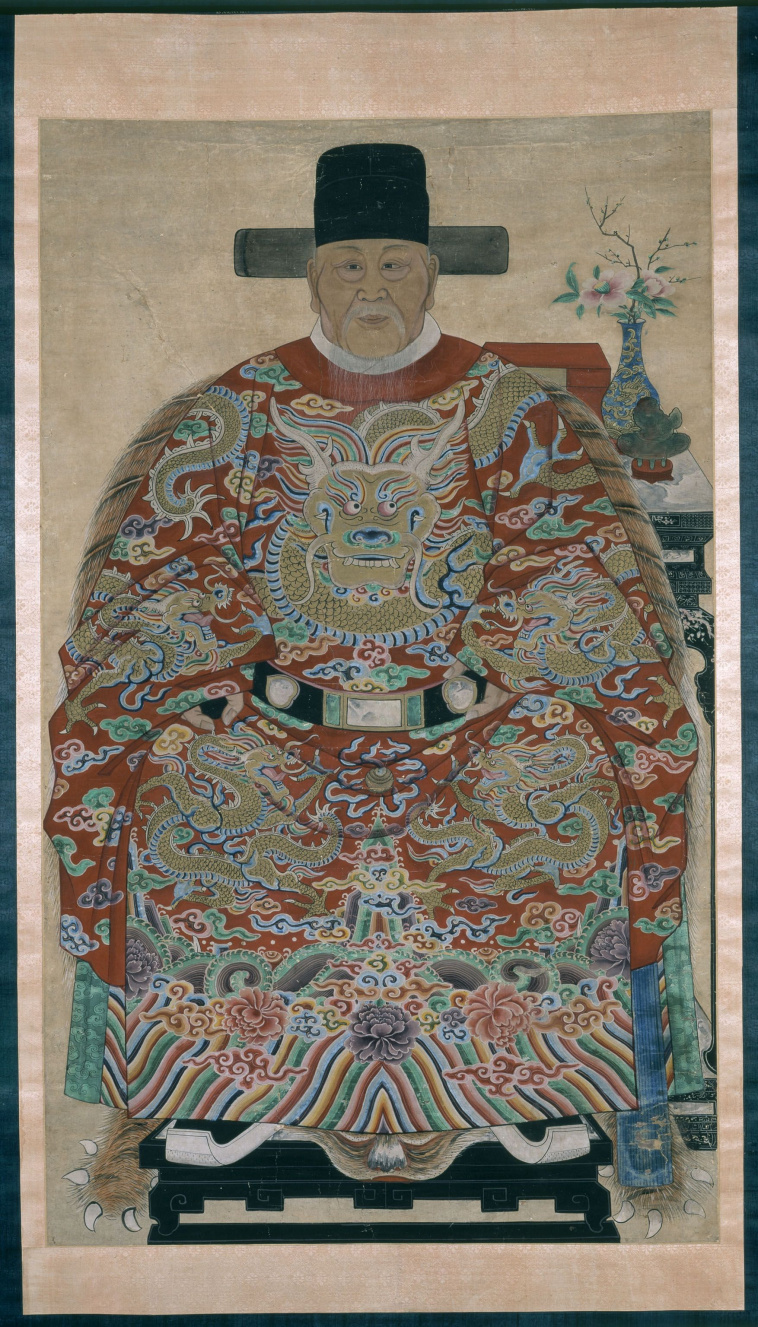

In [24]:
response = requests.get(url1)
if response.status_code == 200:
    filename = "image1.jpg"
    with open(filename, 'wb') as f:
        f.write(response.content)

PIL.Image.open("image1.jpg")

### 4. Généralisation du scrapping

Etapes à réaliser pour lancer la méthode de scrapping généralisée :
- Faire une liste vide pour stocker chaque df créé à chaque boucle de pages

For loop
- Faire une boucle for sur les numéros de pages de 1 à ... commencer petit 2 ou 3 (vérifier) 
- Faire une url avec une fstring sur le numéro de page 
- soup 
- chercher les artistes, titres, images
- faire un dataframe pour la boucle/page
- sauvegarde DataFrame_to_csv(pages#) avec le nom de la page/boucle/itération
- time.sleep(15 secondes)

Liste à transformer en pd.concat qui va donner un gros dataframe avec toutes les pages
Donner le nom d'une variable pour le df final et sauvegarder sur disque avec DataFrame_to_csv(df_final)



In [ ]:
# URL des pages à scrapper
# recherche des musées/périodes et techniques, puis inspector > network > afficher plus > trouver le lien avec la page
url_guimet ='https://art.rmngp.fr/fr/library/artworks?locations=Paris%2C%20mus%C3%A9e%20Guimet%20-%20mus%C3%A9e%20national%20des%20Arts%20asiatiques'
url_armée ='https://art.rmngp.fr/fr/library/artworks?k=mus%C3%A9e%20de%20l%27arm%C3%A9e&techniques=huile%20sur%20toile&ajax=1&page=1'
url_fram ='https://art.rmngp.fr/fr/library/artworks?k=mus%C3%A9e%20franco-am%C3%A9ricain&techniques=huile%20sur%20toile&ajax=1&page=1'
url_japon_edo ='https://art.rmngp.fr/fr/library/artworks?k=japon%20edo&techniques=estampe%20nishike-e&ajax=1&page=1'
url_cont = 'https://art.rmngp.fr/fr/library/artworks?k=p%C3%A9riode%20contemporaine&techniques=huile%20sur%20toile&ajax=1&page=1'

#### A. Test - Musée Guimet - encre

In [6]:
# url = https://art.rmngp.fr/fr/library/artworks?locations=Paris%2C%20mus%C3%A9e%20Guimet%20-%20mus%C3%A9e%20national%20des%20Arts%20asiatiques&techniques=peinture%20sur%20papier&ajax=1&page=1
# url = https://art.rmngp.fr/fr/library/artworks?locations=Paris%2C%20mus%C3%A9e%20Guimet%20-%20mus%C3%A9e%20national%20des%20Arts%20asiatiques&techniques=encre%20de%20Chine&ajax=1&page=1

image_add =[]
authors = []
title = []
image_url = []

for n in range (1,50) :
    url_page = f'https://art.rmngp.fr/fr/library/artworks?locations=Paris%2C%20mus%C3%A9e%20Guimet%20-%20mus%C3%A9e%20national%20des%20Arts%20asiatiques&techniques=encre%20de%20Chine&ajax=1&page={n}'
    response = requests.get(url_page)
    soup = BeautifulSoup(response.text, "html.parser")
    # recherche des artists
    for element in soup.find_all(class_='field--name-ef-summarized-authors-mini'):
        authors.append(element.text)
    # recherche des titres de tableaux
    for element in soup.find_all(class_='field--name-api-artwork-title'):
        title.append(element.text.strip())
    # recherche des liens vers les photos
    for element in soup.find_all(class_='field--name-api-artwork-main-image'):
        image_url.append(element.find('img').attrs['src'])
    time.sleep(random.randint(5,15))
    # constitution du dataframe de la boucle
    df = pd.DataFrame({
            'author': authors,
            'title' : title,
            'image_url' : image_url
            })
    df.to_csv('../raw_data/csv/guimet-encre_page_1_50.csv')

In [7]:
len(authors), len(title), len(image_url)

(463, 463, 463)

In [8]:
for i, url in enumerate(image_url):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        format = img.format.lower()
        #img.save(f'../raw_data/csv/images/{i}.{format}')
        img.save(f'../raw_data/csv/images/{authors[i]}_{title[i]}_{i}.{format}')
    except Exception as e:
        print(f'Image {i} with {url} not downloaded')

Image 36 with https://api.art.rmngp.fr/v1/images/17/166845/l?t=6NkkrO63uCDHaeWDQmRoKA not downloaded
Image 305 with https://api.art.rmngp.fr/v1/images/17/1009155/l?t=h8Znl4rDu3avU5EBpPuwSg not downloaded


In [ ]:
# si je veux refaire un dataframe à partir du dossier > faire un glob

#### A. Musée Guimet - Peinture sur papier

In [9]:
# url = https://art.rmngp.fr/fr/library/artworks?locations=Paris%2C%20mus%C3%A9e%20Guimet%20-%20mus%C3%A9e%20national%20des%20Arts%20asiatiques&techniques=peinture%20sur%20papier&ajax=1&page=1
# 457 results

image_addA =[]
authorsA = []
titleA = []
image_urlA = []

for n in range (1,50) :
    url_page = f'https://art.rmngp.fr/fr/library/artworks?locations=Paris%2C%20mus%C3%A9e%20Guimet%20-%20mus%C3%A9e%20national%20des%20Arts%20asiatiques&techniques=peinture%20sur%20papier&ajax=1&page={n}'
    response = requests.get(url_page)
    soup = BeautifulSoup(response.text, "html.parser")
    # recherche des artists
    for element in soup.find_all(class_='field--name-ef-summarized-authors-mini'):
        authorsA.append(element.text)
    # recherche des titres de tableaux
    for element in soup.find_all(class_='field--name-api-artwork-title'):
        titleA.append(element.text.strip())
    # recherche des liens vers les photos
    for element in soup.find_all(class_='field--name-api-artwork-main-image'):
        image_urlA.append(element.find('img').attrs['src'])
    time.sleep(random.randint(5,15))
    # constitution du dataframe de la boucle
    df = pd.DataFrame({
            'author': authorsA,
            'title' : titleA,
            'image_url' : image_urlA
            })
    df.to_csv('../raw_data/csv/guimet_page_1_50.csv')

In [10]:
len(authors), len(title), len(image_url)

(463, 463, 463)

In [12]:
for i, url in enumerate(image_urlA):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        format = img.format.lower()
        #img.save(f'../raw_data/csv/images/{i}.{format}')
        img.save(f'../raw_data/csv/images/{authorsA[i]}_{titleA[i]}_{i}.{format}')
    except Exception as e:
        print(f'Image {i} with {url} not downloaded')

Image 31 with https://api.art.rmngp.fr/v1/images/17/166845/l?t=6NkkrO63uCDHaeWDQmRoKA not downloaded
Image 208 with https://api.art.rmngp.fr/v1/images/17/1016829/l?t=VwPkRas9v46SzlvIlDDd7Q not downloaded
Image 298 with https://api.art.rmngp.fr/v1/images/17/170093/l?t=iSS8LzsTu8ostLKIwVMZXQ not downloaded
Image 350 with https://api.art.rmngp.fr/v1/images/17/1016823/l?t=r_TYluuAjxpK_O2N3Glj_Q not downloaded
Image 351 with https://api.art.rmngp.fr/v1/images/17/1016835/l?t=F3xgrGdV9OK6685IBl8OkA not downloaded


#### B. Musée de l'armée - technique huile sur toile

In [ ]:
# url = 'https://art.rmngp.fr/fr/library/artworks?k=mus%C3%A9e%20de%20l%27arm%C3%A9e&techniques=huile%20sur%20toile&ajax=1&page=1'
# 14338 results

image_addB =[]
authorsB = []
titleB = []
image_urlB = []

for n in range(2,50) :
    url_page = f'https://art.rmngp.fr/fr/library/artworks?k=mus%C3%A9e%20de%20l%27arm%C3%A9e&techniques=huile%20sur%20toile&ajax=1&page={n}'
    response = requests.get(url_page)
    soup = BeautifulSoup(response.text, "html.parser")
    # recherche des artists
    for element in soup.find_all(class_='field--name-ef-summarized-authors-mini'):
        authorsB.append(element.text)
    # recherche des titres de tableaux
    for element in soup.find_all(class_='field--name-api-artwork-title'):
        titleB.append(element.text.strip())
    # recherche des liens vers les photos
    for element in soup.find_all(class_='field--name-api-artwork-main-image'):
        image_urlB.append(element.find('img').attrs['src'])
    time.sleep(random.randint(5,15))
    # constitution du dataframe de la boucle
    dfB = pd.DataFrame({
            'author': authorsB,
            'title' : titleB,
            'image_url' : image_urlB
            })
    dfB.to_csv('../raw_data/csv/musee_armee_page_1_50.csv')

In [49]:
len(authorsB), len(titleB), len(image_urlB)

(960, 960, 960)

In [54]:
for i, url in enumerate(image_urlB):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        format = img.format.lower()
        #img.save(f'../raw_data/csv/images/{i}.{format}')
        img.save(f'../raw_data/csv/images/{authorsB[i]}_{titleB[i]}_{i}.{format}')
    except Exception as e:
        print(f'Image {i} with {url} not downloaded')

Image 84 with https://api.art.rmngp.fr/v1/images/17/1003083/l?t=AKVc4c7mf4Mo0Uf6QuXYIA not downloaded
Image 89 with https://api.art.rmngp.fr/v1/images/17/195659/l?t=uIwnnAVgw7Vf_Kqfs_KG9Q not downloaded
Image 116 with https://api.art.rmngp.fr/v1/images/17/187098/l?t=IF1wIEP2DVMopdIPhfkNyQ not downloaded
Image 127 with https://api.art.rmngp.fr/v1/images/17/195603/l?t=4U5ZeSzB8-vwX56q_lnGaA not downloaded
Image 142 with https://api.art.rmngp.fr/v1/images/17/197900/l?t=otdwNfFFYJMyOVdxMEcYoQ not downloaded
Image 155 with https://api.art.rmngp.fr/v1/images/17/192116/l?t=GP08RmgyN_oZs1RKWQZT-g not downloaded
Image 156 with https://api.art.rmngp.fr/v1/images/17/214919/l?t=8jBuP2Jlajgr4hLRw3rqxQ not downloaded
Image 190 with https://api.art.rmngp.fr/v1/images/17/1229886/l?t=xxwXF55csPNhnJjz1J2XYQ not downloaded
Image 191 with https://api.art.rmngp.fr/v1/images/17/185442/l?t=0j4MJohOMe4aRxVn-vk1ng not downloaded
Image 290 with https://api.art.rmngp.fr/v1/images/17/192517/l?t=5PaB6ynaoC8ePbDOqo

#### C. Musée franco-américain - technique huile sur toile

In [55]:
# url = 'https://art.rmngp.fr/fr/library/artworks?k=mus%C3%A9e%20franco-am%C3%A9ricain&techniques=huile%20sur%20toile&ajax=1&page=1'
# 13724 results

image_addC =[]
authorsC = []
titleC = []
image_urlC = []

for n in range(1,50) :
    url_page = f'https://art.rmngp.fr/fr/library/artworks?k=mus%C3%A9e%20franco-am%C3%A9ricain&techniques=huile%20sur%20toile&ajax=1&page={n}'
    response = requests.get(url_page)
    soup = BeautifulSoup(response.text, "html.parser")
    # recherche des artists
    for element in soup.find_all(class_='field--name-ef-summarized-authors-mini'):
        authorsC.append(element.text)
    # recherche des titres de tableaux
    for element in soup.find_all(class_='field--name-api-artwork-title'):
        titleC.append(element.text.strip())
    # recherche des liens vers les photos
    for element in soup.find_all(class_='field--name-api-artwork-main-image'):
        image_urlC.append(element.find('img').attrs['src'])
    time.sleep(random.randint(5,15))
    # constitution du dataframe de la boucle
    dfB = pd.DataFrame({
            'author': authorsC,
            'title' : titleC,
            'image_url' : image_urlC
            })
    dfB.to_csv('../raw_data/csv/musee_fram_page_1_50.csv')

In [69]:
len(authorsC), len(titleC), len(image_urlC)

(979, 979, 979)

In [70]:
for i, url in enumerate(image_urlC):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        format = img.format.lower()
        #img.save(f'../raw_data/csv/images/{i}.{format}')
        img.save(f'../raw_data/csv/images/{authorsC[i]}_{titleC[i]}_{i}.{format}')
    except Exception as e:
        print(f'Image {i} with {url} not downloaded')

Image 35 with https://api.art.rmngp.fr/v1/images/17/197900/l?t=otdwNfFFYJMyOVdxMEcYoQ not downloaded
Image 41 with https://api.art.rmngp.fr/v1/images/17/192116/l?t=GP08RmgyN_oZs1RKWQZT-g not downloaded
Image 42 with https://api.art.rmngp.fr/v1/images/17/214919/l?t=8jBuP2Jlajgr4hLRw3rqxQ not downloaded
Image 49 with https://api.art.rmngp.fr/v1/images/17/1229886/l?t=xxwXF55csPNhnJjz1J2XYQ not downloaded
Image 50 with https://api.art.rmngp.fr/v1/images/17/185442/l?t=0j4MJohOMe4aRxVn-vk1ng not downloaded
Image 83 with https://api.art.rmngp.fr/v1/images/17/193649/l?t=c_7huIBBRlDd1TP4Pj6YsQ not downloaded
Image 94 with https://api.art.rmngp.fr/v1/images/17/136036/l?t=HGf3Md6fNsETiihA0JRnfQ not downloaded
Image 105 with https://api.art.rmngp.fr/v1/images/17/136082/l?t=-LZaR1o4WasjtWs0-AchqQ not downloaded
Image 178 with https://api.art.rmngp.fr/v1/images/17/137726/l?t=bIT12px0idnvFoQ1F5Tmrg not downloaded
Image 222 with https://api.art.rmngp.fr/v1/images/17/192517/l?t=5PaB6ynaoC8ePbDOqoubZA n

#### E. Période Japon Edo - technique estampe

In [76]:
# url = 'https://art.rmngp.fr/fr/library/artworks?k=japon%20edo&techniques=estampe%20nishike-e&ajax=1&page=1'
# 1005 results

image_addE =[]
authorsE = []
titleE = []
image_urlE = []

for n in range(1,50) :
    url_page = f'https://art.rmngp.fr/fr/library/artworks?k=japon%20edo&techniques=estampe%20nishike-e&ajax=1&page={n}'
    response = requests.get(url_page)
    soup = BeautifulSoup(response.text, "html.parser")
    # recherche des artists
    for element in soup.find_all(class_='field--name-ef-summarized-authors-mini'):
        authorsE.append(element.text)
    # recherche des titres de tableaux
    for element in soup.find_all(class_='field--name-api-artwork-title'):
        titleE.append(element.text.strip())
    # recherche des liens vers les photos
    for element in soup.find_all(class_='field--name-api-artwork-main-image'):
        image_urlE.append(element.find('img').attrs['src'])
    time.sleep(random.randint(5,15))
    # constitution du dataframe de la boucle
    dfE = pd.DataFrame({
            'author': authorsE,
            'title' : titleE,
            'image_url' : image_urlE
            })
    dfE.to_csv('../raw_data/csv/periode_japon_edo_page_1_50.csv')

In [77]:
len(authorsE), len(titleE), len(image_urlE)

(979, 979, 979)

In [78]:
for i, url in enumerate(image_urlE):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        format = img.format.lower()
        #img.save(f'../raw_data/csv/images/{i}.{format}')
        img.save(f'../raw_data/csv/images/{authorsE[i]}_{titleE[i]}_{i}.{format}')
    except Exception as e:
        print(f'Image {i} with {url} not downloaded')

Image 147 with https://api.art.rmngp.fr/v1/images/17/1009059/l?t=WrTpc60e57wMr4tYc3El5g not downloaded
Image 364 with https://api.art.rmngp.fr/v1/images/17/1148743/l?t=21iqu5hrpxWZ68E5KpUFrw not downloaded
Image 367 with https://api.art.rmngp.fr/v1/images/17/1003231/l?t=v1xW7tnWRhVmftzV9tQlsA not downloaded
Image 368 with https://api.art.rmngp.fr/v1/images/17/1001693/l?t=3LabLrrLhocB3kMD-RxILg not downloaded
Image 370 with https://api.art.rmngp.fr/v1/images/17/1001705/l?t=j5GT-1phML4TVwebYjE2CA not downloaded
Image 375 with https://api.art.rmngp.fr/v1/images/17/1001633/l?t=dtdrTyyV1COBppHQVv4w6w not downloaded
Image 376 with https://api.art.rmngp.fr/v1/images/17/1003218/l?t=yYVfQrPDzv0UTBt1q3Ra1g not downloaded
Image 378 with https://api.art.rmngp.fr/v1/images/17/1003216/l?t=9UBBueGIDB0spMObagAwWw not downloaded
Image 381 with https://api.art.rmngp.fr/v1/images/17/1001681/l?t=pgKtwiBkGosqs8J04N096A not downloaded
Image 382 with https://api.art.rmngp.fr/v1/images/17/1003220/l?t=KhUTUHkL

#### F. Période Contemporaine - technique huile sur toile

In [79]:
# url = 'https://art.rmngp.fr/fr/library/artworks?k=p%C3%A9riode%20contemporaine&techniques=huile%20sur%20toile&ajax=1&page=1'
# 17460 results

image_addF =[]
authorsF = []
titleF = []
image_urlF = []

for n in range(1,50) :
    url_page = f'https://art.rmngp.fr/fr/library/artworks?k=p%C3%A9riode%20contemporaine&techniques=huile%20sur%20toile&ajax=1&page={n}'
    response = requests.get(url_page)
    soup = BeautifulSoup(response.text, "html.parser")
    # recherche des artists
    for element in soup.find_all(class_='field--name-ef-summarized-authors-mini'):
        authorsF.append(element.text)
    # recherche des titres de tableaux
    for element in soup.find_all(class_='field--name-api-artwork-title'):
        titleF.append(element.text.strip())
    # recherche des liens vers les photos
    for element in soup.find_all(class_='field--name-api-artwork-main-image'):
        image_urlF.append(element.find('img').attrs['src'])
    time.sleep(random.randint(5,15))
    # constitution du dataframe de la boucle
    dfF = pd.DataFrame({
            'author': authorsF,
            'title' : titleF,
            'image_url' : image_urlF
            })
    dfF.to_csv('../raw_data/csv/periode_contemporaine_page_1_50.csv')

In [80]:
len(authorsF), len(titleF), len(image_urlF)

(980, 980, 980)

In [81]:
for i, url in enumerate(image_urlF):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        format = img.format.lower()
        #img.save(f'../raw_data/csv/images/{i}.{format}')
        img.save(f'../raw_data/csv/images/{authorsF[i]}_{titleF[i]}_{i}.{format}')
    except Exception as e:
        print(f'Image {i} with {url} not downloaded')

Image 45 with https://api.art.rmngp.fr/v1/images/17/206109/l?t=gWTSbkmU1bQakxw-6zxf6w not downloaded
Image 52 with https://api.art.rmngp.fr/v1/images/17/106259/l?t=xKXbtyZMki_rEUOR0fCEtA not downloaded
Image 106 with https://api.art.rmngp.fr/v1/images/17/94287/l?t=dRksdFYs0fMX7JvuXBRsag not downloaded
Image 191 with https://api.art.rmngp.fr/v1/images/17/125957/l?t=iLy8r-F5UK4M4Dk1s4_xag not downloaded
Image 254 with https://api.art.rmngp.fr/v1/images/17/162854/l?t=O-4j3JSAvBZWvUzInzBlRA not downloaded
Image 287 with https://api.art.rmngp.fr/v1/images/17/189007/l?t=TJXU-Z_OrBjWd4G6ClNLZw not downloaded
Image 293 with https://api.art.rmngp.fr/v1/images/17/143061/l?t=YvEPNlmuSRgA0lsoWNrvyA not downloaded
Image 431 with https://api.art.rmngp.fr/v1/images/17/95090/l?t=ddKDK9Wjt4HhrskH92SMIA not downloaded
Image 544 with https://api.art.rmngp.fr/v1/images/17/1281904/l?t=MSEfiCEu1MoubYJYONGM0g not downloaded
Image 556 with https://api.art.rmngp.fr/v1/images/17/808816/l?t=G_d4me3Tebd3ltQtY70Dw